In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import argparse
import matplotlib.pyplot as plt
import cv2
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from __future__ import print_function
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, AveragePooling2D
from tensorflow.keras.layers import Conv2D, Convolution2D, ZeroPadding2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import os
import h5py
import glob
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model

import os

In [ ]:
num_classes = 3
img_rows, img_cols = 48, 48
batch_size = 256

train_data = '/content/drive/MyDrive/Fer_Lfw/train'
test_data =  '/content/drive/MyDrive/Fer_Lfw/test'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_data,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Found 38039 images belonging to 3 classes.


In [ ]:
validation_generator = val_datagen.flow_from_directory(
        test_data,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Found 1157 images belonging to 3 classes.


In [ ]:
for data in train_generator:
  print(data[0].shape)
  break

(256, 48, 48, 1)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 46, 46, 6)         60        
                                                                 
 average_pooling2d_6 (Averag  (None, 23, 23, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_53 (Conv2D)          (None, 21, 21, 16)        880       
                                                                 
 average_pooling2d_7 (Averag  (None, 10, 10, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_23 (Dense)            (None, 120)              

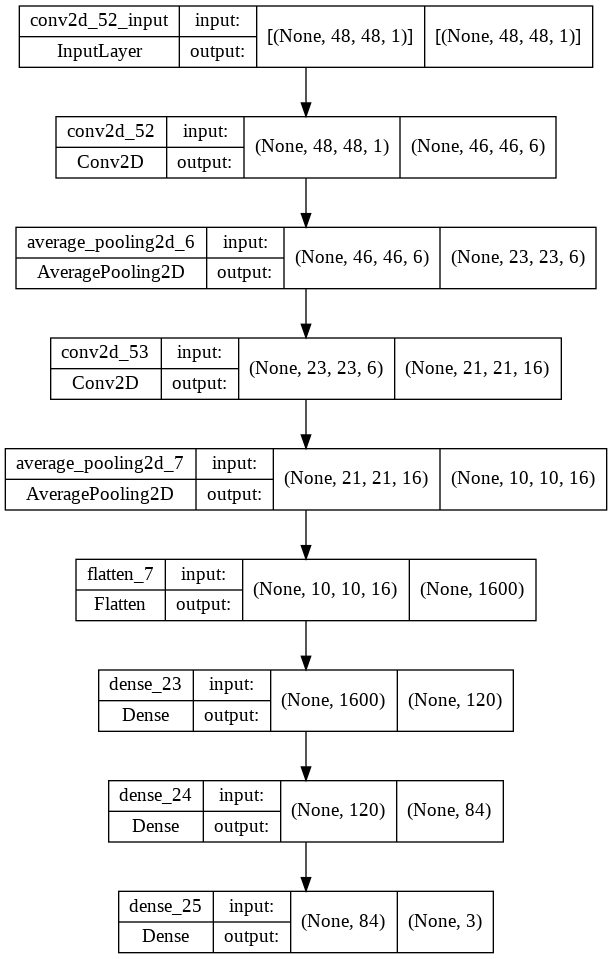

In [ ]:
#LENET-5
model1 = keras.Sequential()

#1
model1.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model1.add(AveragePooling2D())

#2
model1.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model1.add(AveragePooling2D())

#3
model1.add(Flatten())

#4
model1.add(Dense(units=120, activation='relu'))

#5
model1.add(Dense(units=84, activation='relu'))

#6
model1.add(Dense(units=num_classes, activation = 'softmax'))
model1.summary()
plot_model(model1, to_file='LeNet5.png', show_shapes=True, show_layer_names=True)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 12, 12, 96)        11712     
                                                                 
 batch_normalization_27 (Bat  (None, 12, 12, 96)       384       
 chNormalization)                                                
                                                                 
 activation_27 (Activation)  (None, 12, 12, 96)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 6, 6, 96)         0         
 g2D)                                                            
                                                                 
 conv2d_76 (Conv2D)          (None, 6, 6, 256)         614656    
                                                                 
 batch_normalization_28 (Bat  (None, 6, 6, 256)      

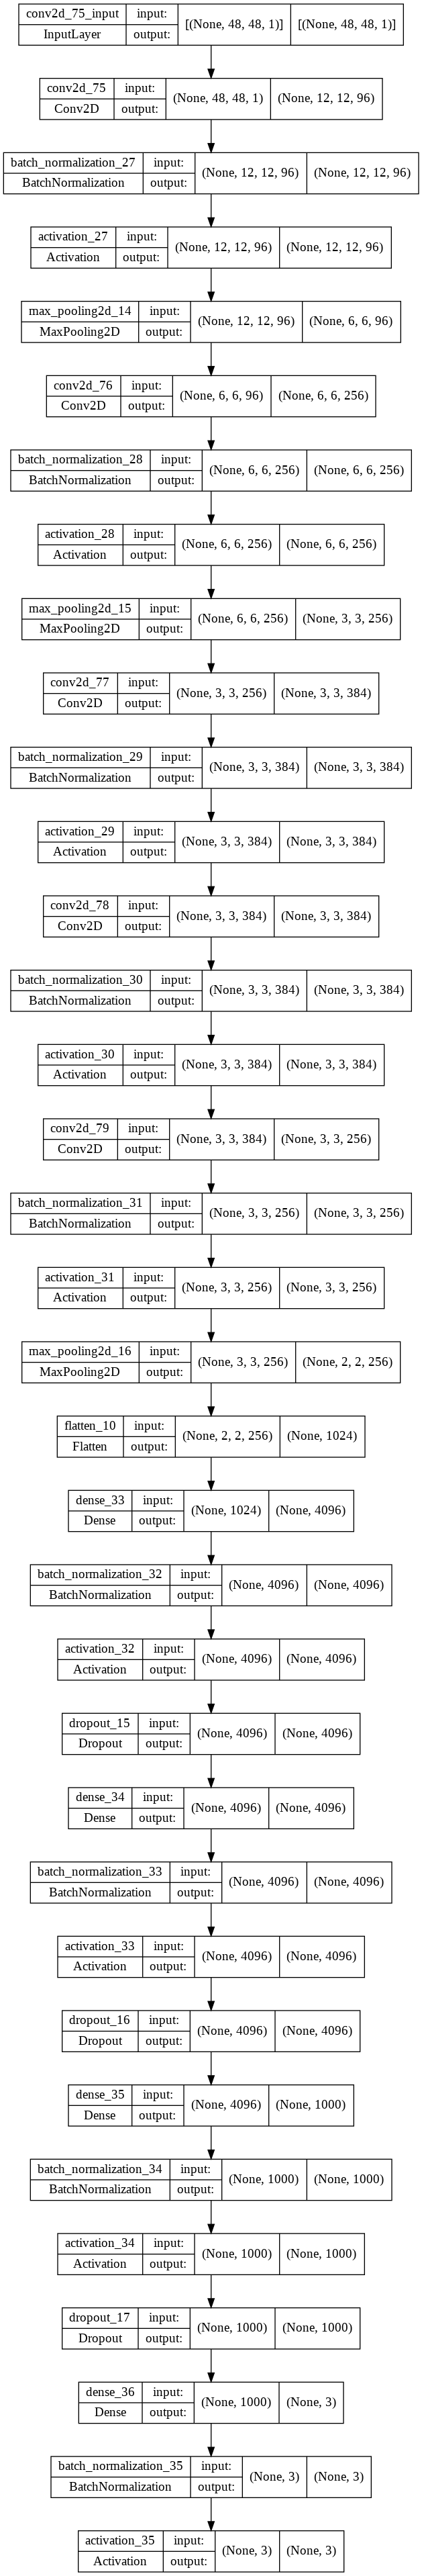

In [ ]:
#Instantiation
AlexNet = keras.Sequential()

#1
AlexNet.add(Conv2D(filters=96, input_shape=(48,48,1), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#6
AlexNet.add(Flatten())

#7
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#8
AlexNet.add(Dropout(0.4))

#9
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#10
AlexNet.add(Dropout(0.4))

#11
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#12
AlexNet.add(Dropout(0.4))

#13
AlexNet.add(Dense(num_classes))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))
AlexNet.summary()
plot_model(AlexNet, to_file='AlexNet.png', show_shapes=True, show_layer_names=True)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_36 (ZeroPadd  (None, 50, 50, 1)        0         
 ing2D)                                                          
                                                                 
 conv2d_59 (Conv2D)          (None, 16, 16, 64)        640       
                                                                 
 zero_padding2d_37 (ZeroPadd  (None, 18, 18, 64)       0         
 ing2D)                                                          
                                                                 
 conv2d_60 (Conv2D)          (None, 6, 6, 64)          36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                     

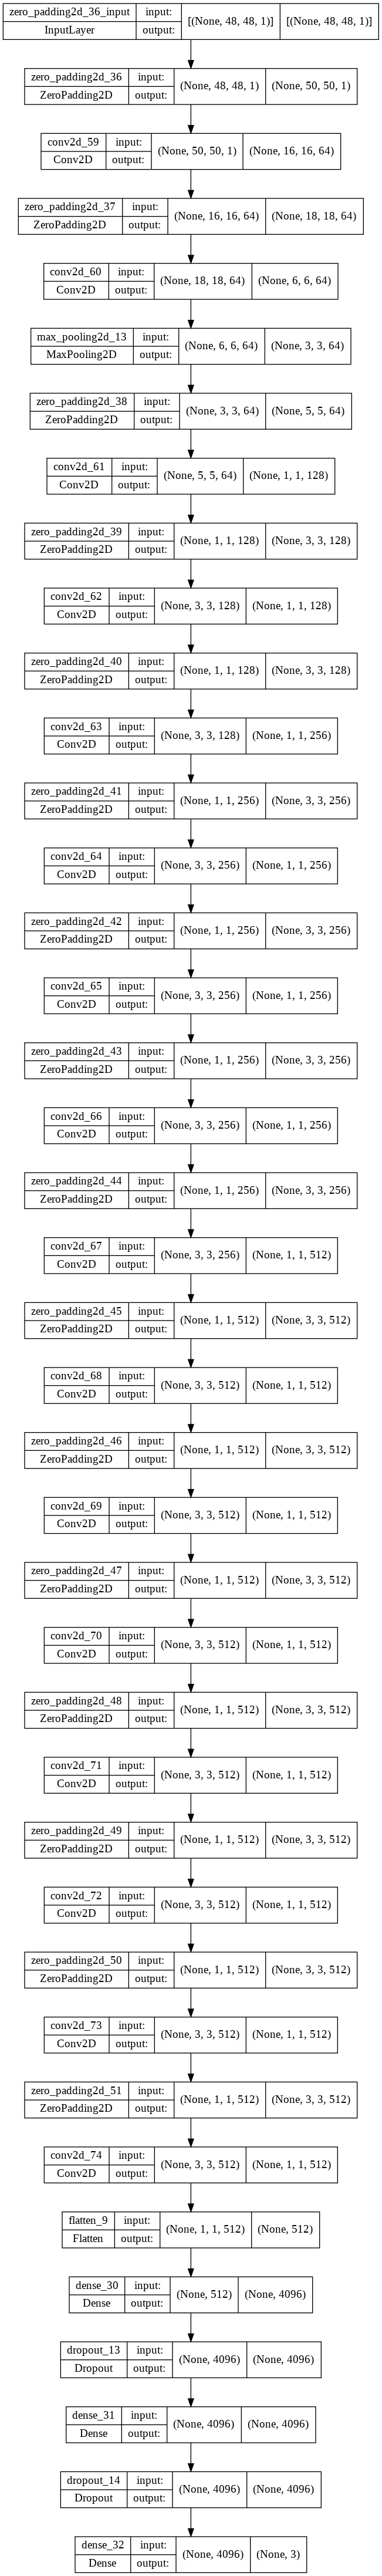

In [ ]:
#VGG-19
model3 = keras.Sequential()
model3.add(ZeroPadding2D((1,1),input_shape=(48,48,1)))
model3.add(Convolution2D(64, 3, 3, activation='relu'))
model3.add(ZeroPadding2D((1,1)))
model3.add(Convolution2D(64, 3, 3, activation='relu'))
model3.add(MaxPooling2D((2,2), strides=(2,2)))

model3.add(ZeroPadding2D((1,1)))
model3.add(Convolution2D(128, 3, 3, activation='relu'))
model3.add(ZeroPadding2D((1,1)))
model3.add(Convolution2D(128, 3, 3, activation='relu'))
# model3.add(MaxPooling2D((2,2), strides=(2,2)))

model3.add(ZeroPadding2D((1,1)))
model3.add(Convolution2D(256, 3, 3, activation='relu'))
model3.add(ZeroPadding2D((1,1)))
model3.add(Convolution2D(256, 3, 3, activation='relu'))
model3.add(ZeroPadding2D((1,1)))
model3.add(Convolution2D(256, 3, 3, activation='relu'))
model3.add(ZeroPadding2D((1,1)))
model3.add(Convolution2D(256, 3, 3, activation='relu'))
# model3.add(MaxPooling2D((2,2), strides=(2,2)))

model3.add(ZeroPadding2D((1,1)))
model3.add(Convolution2D(512, 3, 3, activation='relu'))
model3.add(ZeroPadding2D((1,1)))
model3.add(Convolution2D(512, 3, 3, activation='relu'))
model3.add(ZeroPadding2D((1,1)))
model3.add(Convolution2D(512, 3, 3, activation='relu'))
model3.add(ZeroPadding2D((1,1)))
model3.add(Convolution2D(512, 3, 3, activation='relu'))
# model3.add(MaxPooling2D((2,2), strides=(2,2)))

model3.add(ZeroPadding2D((1,1)))
model3.add(Convolution2D(512, 3, 3, activation='relu'))
model3.add(ZeroPadding2D((1,1)))
model3.add(Convolution2D(512, 3, 3, activation='relu'))
model3.add(ZeroPadding2D((1,1)))
model3.add(Convolution2D(512, 3, 3, activation='relu'))
model3.add(ZeroPadding2D((1,1)))
model3.add(Convolution2D(512, 3, 3, activation='relu'))
# model3.add(MaxPooling2D((2,2), strides=(2,2)))

model3.add(Flatten())
model3.add(Dense(4096, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(4096, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))
model3.summary()
plot_model(model3, to_file='Vgg19.png', show_shapes=True, show_layer_names=True)

In [ ]:
epochs = 10    
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Fer_Lfw/ModelOuts/AlexNet.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate 
AlexNet.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics = ['accuracy'])

nb_train_samples = 37966 
nb_validation_samples = 1157

history = AlexNet.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
148/148 [==============================] - ETA: 0s - loss: 0.9878 - accuracy: 0.5103  
Epoch 1: val_loss improved from inf to 1.64829, saving model to /content/drive/MyDrive/Fer_Lfw/ModelOuts/AlexNet.h5
148/148 [==============================] - 10202s 69s/step - loss: 0.9878 - accuracy: 0.5103 - val_loss: 1.6483 - val_accuracy: 0.0811 - lr: 0.0010
Epoch 2/10
148/148 [==============================] - ETA: 0s - loss: 0.8501 - accuracy: 0.6120
Epoch 2: val_loss improved from 1.64829 to 1.12933, saving model to /content/drive/MyDrive/Fer_Lfw/ModelOuts/AlexNet.h5
148/148 [==============================] - 105s 710ms/step - loss: 0.8501 - accuracy: 0.6120 - val_loss: 1.1293 - val_accuracy: 0.3691 - lr: 0.0010
Epoch 3/10
148/148 [==============================] - ETA: 0s - loss: 0.7692 - accuracy: 0.6626
Epoch 3: val_loss improved from 1.12933 to 0.87931, saving model to /content/drive/MyDrive/Fer_Lfw/ModelOuts/AlexNet.h5
148/148 [==============================] - 101s 681ms/step

In [ ]:
Epoch 100/100
148/148 [==============================] - 518s 3.5s/step - loss: 0.3703 - accuracy: 0.8712 - val_loss: 0.3913 - val_accuracy: 0.8429 - lr: 0.0010